In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
import time
import graphviz

## Clock time

In [ ]:
start_time = time.time()

# do something here

print("time to run:", time.time() - start_time)

## Create DataFrame from dictionary

In [29]:
fake_data_dict = { 'fake_a': [0,0,1], 'fake_b': [1.5, 2], 'fake_c': [3], 'fake_d': [4, None, 6] }

fake_data_with_dict_index = pd.DataFrame.from_dict(data=fake_data_dict,
                                  orient='index',
                                  columns=['count_1', 'count_2', 'count_3'])
fake_data_with_dict_index

,count_1,count_2,count_3
fake_a,0.0,0.0,1.0
fake_b,1.5,2.0,NaN
fake_c,3.0,NaN,NaN
fake_d,4.0,NaN,6.0


In [28]:
fake_data_dict_same_num_columns = { 'fake_a': [0, None, 1], 'fake_b': [None, 1.5, 2], 'fake_c': [None, None, 3], 'fake_d': [4, None, 3] }

fake_data_with_dict_columns = pd.DataFrame.from_dict(data=fake_data_dict_same_num_columns)
fake_data_with_dict_columns

,fake_a,fake_b,fake_c,fake_d
0,0.0,NaN,NaN,4.0
1,NaN,1.5,NaN,NaN
2,1.0,2.0,3.0,3.0


## Create DataFrame from list of lists

In [43]:
fake_data_list = [['fake_a', 1.9, 'yes', 4], ['fake_a', 1.55, 'no', 3], ['fake_c', None, None, None],
                  ['fake_b', 1.3, 'yes', 8], ['fake_c', -1.64, 'no', 4], ['fake_a', None, 'no', 6],
                  ['fake_b', -1.24, 'yes', None], ['fake_c', -0.99, 'yes', 7], ['fake_b', None, 'no', 5]]

fake_data = pd.DataFrame(data=fake_data_list, columns=['categorical', 'numerical', 'binary', 'integer'])
fake_data

,categorical,numerical,binary,integer
0,fake_a,1.90,yes,4.0
1,fake_a,1.55,no,3.0
2,fake_c,NaN,None,NaN
3,fake_b,1.30,yes,8.0
4,fake_c,-1.64,no,4.0
5,fake_a,NaN,no,6.0
6,fake_b,-1.24,yes,NaN
7,fake_c,-0.99,yes,7.0
8,fake_b,NaN,no,5.0


## See object types

In [44]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   categorical  9 non-null      object 
 1   numerical    6 non-null      float64
 2   binary       8 non-null      object 
 3   integer      7 non-null      float64
dtypes: float64(2), object(2)
memory usage: 416.0+ bytes


## Basis statistics of numerical columns

In [50]:
fake_data.describe()

,numerical,integer
count,6.000000,7.000000
mean,0.146667,5.285714
std,1.598795,1.799471
min,-1.640000,3.000000
25%,-1.177500,4.000000
50%,0.155000,5.000000
75%,1.487500,6.500000
max,1.900000,8.000000


## Count and see unique values of a particular column

In [59]:
print("Number of unique values in select column:", fake_data['categorical'].nunique())
fake_data['categorical'].unique() # wrap it in list() to get just array

Number of unique values in select column: 3


array(['fake_a', 'fake_c', 'fake_b'], dtype=object)

## Null values, missing values
### axis=0 means up and down in 2d, condense 4d tensor of shape 
### (n, m, k, p) to (1, m, k, p)
### axis=1 means right and left in 2d, condense 4d tensor of shape 
### (n, m, k, p) to (n, 1, k, p)
### axis=3 in a 4d tensor, condense 4d tensor of shape 
### (n, m, k, p) to (n, m, k, 1)

## Count number of missing or null values per column, hence axis=0

In [49]:
fake_data.isnull().sum(axis=0)

categorical    0
numerical      3
binary         1
integer        2
dtype: int64

## Count number of missing or null values per data per row(example), hence axis=1

In [61]:
fake_data.isnull().sum(axis=1)

0    0
1    0
2    3
3    0
4    0
5    1
6    1
7    0
8    1
dtype: int64

## Create pie graph of number of rows with x columns of missing values

In [96]:
fake_data['null_count'] = fake_data.isnull().sum(axis=1)
print(fake_data)
print('--------------------------------------------------------')
print(fake_data.groupby('null_count').count().max(axis=1))
print('--------------------------------------------------------')
fakeData_grouped_by_nullCount_dict = fake_data.groupby('null_count').count().max(axis=1).to_dict()
print(fakeData_grouped_by_nullCount_dict)
fakeData_grouped_by_nullCount_dict_renamedKeys = { "{} Null Value(s)".format(key): value for key, value in fakeData_grouped_by_nullCount_dict.items() }
fakeData_grouped_by_nullCount_dict_renamedKeys

  categorical  numerical binary  integer  null_count
0      fake_a       1.90    yes      4.0           0
1      fake_a       1.55     no      3.0           0
2      fake_c        NaN   None      NaN           3
3      fake_b       1.30    yes      8.0           0
4      fake_c      -1.64     no      4.0           0
5      fake_a        NaN     no      6.0           1
6      fake_b      -1.24    yes      NaN           1
7      fake_c      -0.99    yes      7.0           0
8      fake_b        NaN     no      5.0           1
--------------------------------------------------------
null_count
0    5
1    3
3    1
dtype: int64
--------------------------------------------------------
{0: 5, 1: 3, 3: 1}


{'0 Null Value(s)': 5, '1 Null Value(s)': 3, '3 Null Value(s)': 1}

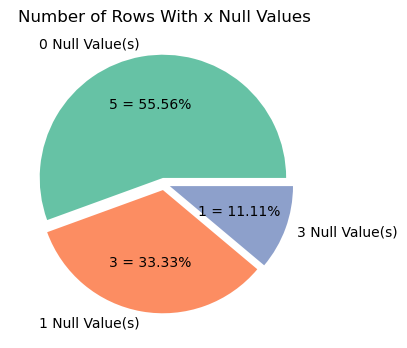

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
# ax = ax.flatten() # if multiple subplots
# _ = ax[0].pie()
# ax[0].set_title()

ax.pie(x=list(fakeData_grouped_by_nullCount_dict_renamedKeys.values()),
       autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(fakeData_grouped_by_nullCount_dict_renamedKeys.values())/100, x),
       explode=[0.05] * len(fakeData_grouped_by_nullCount_dict_renamedKeys.keys()),
       labels=fakeData_grouped_by_nullCount_dict_renamedKeys.keys(),
       colors=sns.color_palette("Set2")[0:len(fakeData_grouped_by_nullCount_dict_renamedKeys.keys())])

plt.title("Number of Rows With x Null Values")
plt.show()

## Visualize which columns are missing data and how much?

In [110]:
print(fake_data[fake_data['null_count'] == 1].isnull().sum())
print('---------------------------------------------------------------------')
print(fake_data[fake_data['null_count'] == 1].isnull().sum().index[:-1])
fake_data[fake_data['null_count'] == 1]

categorical    0
numerical      2
binary         0
integer        1
null_count     0
dtype: int64
---------------------------------------------------------------------
Index(['categorical', 'numerical', 'binary', 'integer'], dtype='object')


,categorical,numerical,binary,integer,null_count
5,fake_a,NaN,no,6.0,1
6,fake_b,-1.24,yes,NaN,1
8,fake_b,NaN,no,5.0,1


[array([0, 2, 0, 1], dtype=int64), array([0., 0., 0., 0.]), array([0, 1, 1, 1], dtype=int64)]
-----------------------------------------------------------------------
labels: Index(['categorical', 'numerical', 'binary', 'integer'], dtype='object')
-----------------------------------------------------------------------


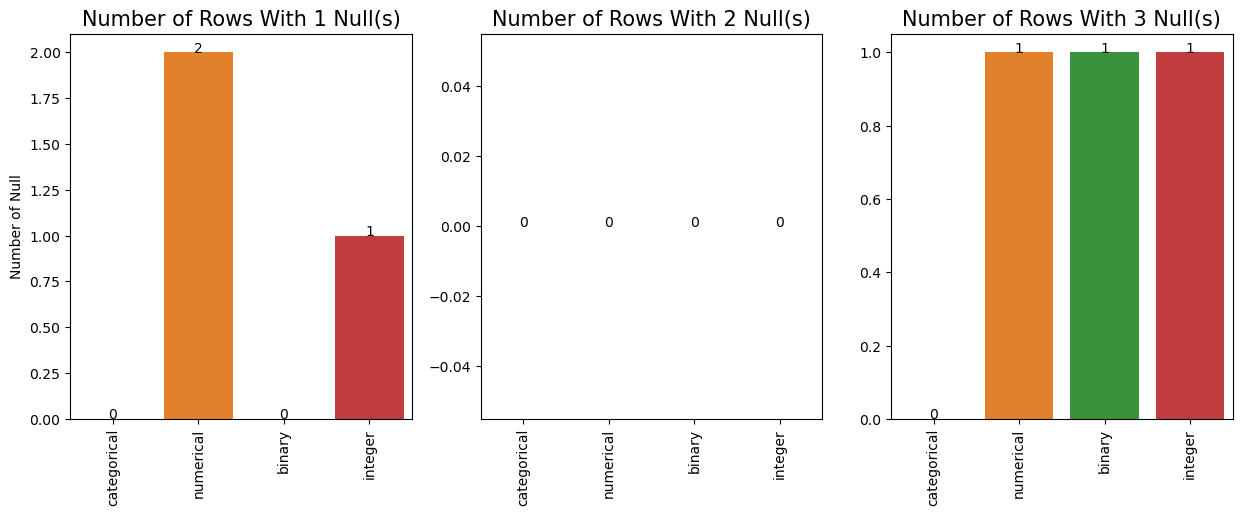

In [126]:
MAX_NUM_MISSING_VALUES = 3

amount_of_null_counts = [
    fake_data[fake_data['null_count'] == x]
    .isnull().sum().values[:-1] for x in range(1, MAX_NUM_MISSING_VALUES + 1)
]

print(amount_of_null_counts)
print('-----------------------------------------------------------------------')
labels = fake_data.columns[:-1] # exclude 'null_count' column
print('labels:', labels)
print('-----------------------------------------------------------------------')

fig, axes = plt.subplots(nrows=1, ncols=MAX_NUM_MISSING_VALUES, figsize=(15, 5))
axes = axes.flatten()

for i in range(MAX_NUM_MISSING_VALUES):
    ax = axes[i]
    _ = sns.barplot(x=labels, y=amount_of_null_counts[i], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(i+1), fontsize=15)
    _ = ax.set_ylabel("Number of Null" if i == 0 else "")
    _ = ax.set_xticks([i for i in range(len(labels))], labels, rotation=90)
    for patch in ax.patches:
        ax.text(x=patch.get_x() + (patch.get_width()/2), 
                y=patch.get_height(),
                s="{:d}".format(int(patch.get_height())),
                ha='center')

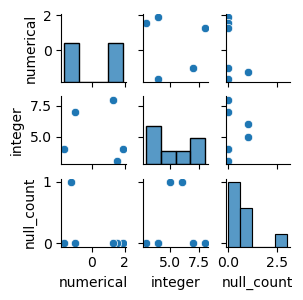

In [131]:
sns.pairplot(fake_data, height=1)
plt.show()

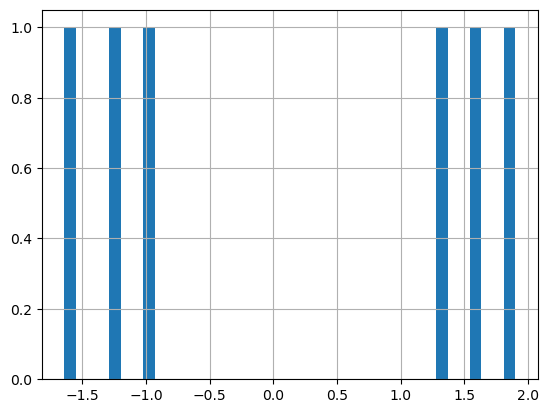

In [139]:
fake_data['numerical'].hist(bins=40)
plt.show()

## Drop columns, default in Pandas is to create a copy, ie: inplace=False

In [ ]:
fake_data.drop(columns=["column_A", "column_K"], axis=1, inplace=True)

## Drop rows with missing values, rows with null values in specific columns

In [ ]:
fake_data.dropna(subset=["column_A", "column_K"], inplace=True)

## Drop rows with certain column values based on numerical condition

In [ ]:
columnK_indices_by_condition = fake_data[fake_data["column_K"] < numerical_condition].index
fake_data.drop(labels=columnK_indices_by_condition, inplace=True)

## Drop rows with certain column values based on list of strings condition

In [ ]:
list_of_strings = ['str1', 'str2', 'str3']
new_df_with_rows_dropped = fake_df[
        fake_df["str_column"].str.contains("|".join(list_of_strings))
]

## Break up a string, split a string at multiple points

In [173]:
import re

example_string_to_breakup = "this .is! an<li></li> example. string"
regex = '!|<li>|</li>|\.'

# note: to get rid of '.', regex needs '\.'
# note: if letter by letter split is wanted, use extra pipe '|' at beginning or end of regex
# regex_with_extra_pipe = "!|<li>|</li>|\."

list_of_broken_strings = re.split(regex, example_string_to_breakup)
print('list_of_broken_strings:', list_of_broken_strings)

whitespace_removed_begin_end = list(map(lambda x: x.strip(), list_of_broken_strings))
print('whitespace_removed_begin_end:', whitespace_removed_begin_end)

substrings_filtered = list(filter(lambda x: x != "string", whitespace_removed_begin_end))
print('substrings_filtered: ', substrings_filtered)

empty_strings_filtered = list(filter(lambda x: x != '', substrings_filtered))
print('empty_strings_filtered:', empty_strings_filtered)

list_of_broken_strings: ['this ', 'is', ' an', '', ' example', ' string']
whitespace_removed_begin_end: ['this', 'is', 'an', '', 'example', 'string']
substrings_filtered:  ['this', 'is', 'an', '', 'example']
empty_strings_filtered: ['this', 'is', 'an', 'example']


## Change data type

In [ ]:
data_type_changed = fake_data.astype(dtype={ 'column_A': np.unit16,
                                             'column_K': np.float16},
                                     copy=False)

## Split dataframe into train, test sets

In [ ]:
train_df = fake_data.sample(frac=0.8, random_state=0)
test_df = train_df.drop(labels=train_df.index)

## Change column name

In [ ]:
fake_data.rename(columns={ "original_column_name": "new_column_name" }, inplace=True)

## Fill null values with arbitrary value

In [ ]:
fake_data["column_with_null_values"].fillna(arbitrary_value, inplace=True)

## Add column, add auxilliary column to indicate missing/not missing feature

In [ ]:
fake_data["missing_data_yes_or_no"] = np.where(condition=fake_data['column_with_nulls'] == some_value,
                                               1,
                                               0)

## Apply transformation to column, apply log transformation

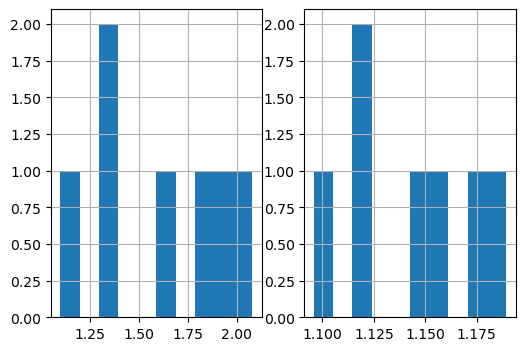

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,4))

fake_data['integer'].apply(np.log).hist(ax=axes[0], bins=10)
(fake_data['integer'] ** (1/4)).apply(np.cbrt).hist(ax=axes[1], bins=10)

plt.show()

## Join dataframes of equal number of rows side by side

In [ ]:
side_by_side_join = pd.concat([df_a.reset_index(drop=True), df_b.reset_index(drop=True)],
                              axis=1)

## Stack dataframes of equal number of columns on top of each other

In [ ]:
stacked_df = pd.concat([df_a, df_b], ignore_index=True, axis=0)

## Graph regression errors

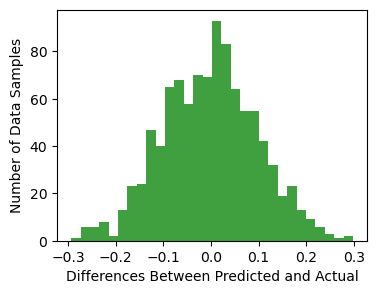

In [276]:
y_test = np.arange(0, 1000, 1)
y_predictions = np.arange(0, 1000, 1) + np.random.normal(loc=0, scale=0.1, size=1000)
difference_real_predictions = y_predictions - y_test
plt.figure(figsize=(4,3))
plt.hist(x=difference_real_predictions, bins=30, color='green', alpha=0.75)
plt.xlabel("Differences Between Predicted and Actual")
plt.ylabel("Number of Data Samples")
plt.show()

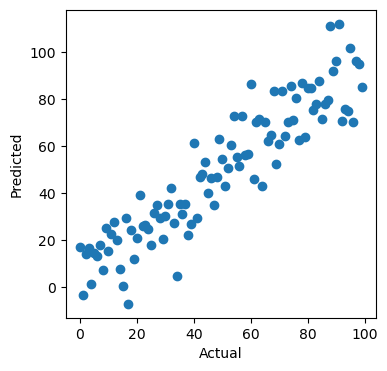

In [294]:
y_test = np.arange(0, 100, 1)
y_predictions = np.arange(0, 100, 1) + np.random.normal(loc=0, scale=10, size=100)
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x=y_test, y=y_predictions)
# ax.scatter(x=np.arange(start=0, stop=100), y=np.arange(start=0, stop=100), linewidth=1.0, linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Repeat a data sample

In [213]:
# step 1: take a sample row from the dataframe
data_sample = fake_data.iloc[0]
print("data sample:\n", data_sample)
print('--------------------------------')

# step 2: step 1 returns a Pandas Series, convert Series to Dataframe and transpose()
data_sample_df = data_sample.to_frame().transpose().values

# step 3: repeat this 1 row dataframe
repeat_n_times = 3
sample_repeated_df = pd.DataFrame(np.repeat(a=data_sample_df,
                                            repeats=repeat_n_times,
                                            axis=0))

sample_repeated_df

data sample:
 categorical    fake_a
numerical         1.9
binary            yes
integer           4.0
null_count          0
Name: 0, dtype: object
--------------------------------


,0,1,2,3,4
0,fake_a,1.9,yes,4.0,0
1,fake_a,1.9,yes,4.0,0
2,fake_a,1.9,yes,4.0,0


## Convert binary column to one hot using various methods
### First method

In [33]:
fake_data['binary_one_hot'] = fake_data['binary'].apply(lambda x: 0 if x == 'no' else 1)
fake_data

,categorical,numerical,binary,integer,binary_one_hot
0,fake_a,1.90,yes,4,1
1,fake_c,-0.99,yes,7,1
2,fake_a,1.55,no,3,0
3,fake_b,1.30,yes,8,1
4,fake_c,-1.64,no,4,0


## Second method

In [179]:
fake_data['binary'].replace(to_replace=['yes', 'no'], value=[1, 0], inplace=False)
## set inplace to True to see change in the whole dataframe

0    1.0
1    0.0
2    NaN
3    1.0
4    0.0
5    0.0
6    1.0
7    1.0
8    0.0
Name: binary, dtype: float64

## Third method

In [ ]:
onehot_dataframe = pd.get_dummies(data=fake_data,
                                  columns=['categorical_column_a', 'categorical_column_k'],
                                  prefix=['cat_a', 'cat_k'])

## Fourth method, using Sklearn OneHotEncoder
## PROBLEM: if you convert one hot encoded categories back to dataframe with columns as categories, then previously unseen categories will form new columns! Messing up training/testing columns!

In [229]:
example_data = [['a', 1.35, 'aa'], ['c', 1.5, 'cc'], ['a', 0.9, 'abc'], ['b', 1.3, 'bb']]
exampledf = pd.DataFrame(data=example_data, columns=['categorical_a', 'numerical', 'categorical_b'])
exampledf

,categorical_a,numerical,categorical_b
0,a,1.35,aa
1,c,1.50,cc
2,a,0.90,abc
3,b,1.30,bb


In [241]:
from sklearn.preprocessing import OneHotEncoder

# one hot encoder with handle_unknown='ignore', puts all zeros for unknown/new category
# note: all Null/None values are grouped into a single category
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# one hot encode only categorical columns with new dataframe 
x = onehot_encoder.fit_transform(exampledf[['categorical_a', 'categorical_b']])
print(x.toarray(), '\n')
print('onehot_encoder.categories_:', onehot_encoder.categories_)

# get the column names of categories
onehot_cats = []
for subarray in onehot_encoder.categories_:
     onehot_cats += list(subarray) 
        
print('\none hot categories found by OneHotEncoder:', onehot_cats)

# convert one hot matrix to new dataframe
xdf = pd.DataFrame(x.toarray(), columns=onehot_cats)

# join original dataframe to one hot matrix with original categorical columns dropped
dropped = exampledf.drop(columns=['categorical_a', 'categorical_b'])
newdf = dropped.join(xdf)
# dropped
newdf

[[1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]] 

onehot_encoder.categories_: [array(['a', 'b', 'c'], dtype=object), array(['aa', 'abc', 'bb', 'cc'], dtype=object)]

one hot categories found by OneHotEncoder: ['a', 'b', 'c', 'aa', 'abc', 'bb', 'cc']


,numerical,a,b,c,aa,abc,bb,cc
0,1.35,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.90,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.30,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Testing Sklearn's OneHotEncoder on a new category previously unseen by OneHotEncoder

In [249]:
test_onehot = [['z', 1.35, 'zz']]
test_onehot_df = pd.DataFrame(data=test_onehot, columns=['categorical_a', 'numerical', 'categorical_b'])

x_test = onehot_encoder.transform(test_onehot_df[['categorical_a', 'categorical_b']])
print("test dataframe example:", test_onehot, '\n')

onehot_cats = []
for subarray in onehot_encoder.categories_:
     onehot_cats += list(subarray) 
        
print('\none hot categories same as previously found by OneHotEncoder:', onehot_cats)

xtestdf = pd.DataFrame(x_test.toarray(), columns=onehot_cats)

testdropped = test_onehot_df.drop(columns=['categorical_a', 'categorical_b'])
testnewdf = testdropped.join(xtestdf)

testnewdf

test dataframe example: [['z', 1.35, 'zz']] 


one hot categories same as previously found by OneHotEncoder: ['a', 'b', 'c', 'aa', 'abc', 'bb', 'cc']


,numerical,a,b,c,aa,abc,bb,cc
0,1.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fifth method, with Sklearn's ColumnTransformer

In [253]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    [('onehot_encoder', OneHotEncoder(handle_unknown='ignore'), ["categorical_a", "categorical_b"])],
    remainder='passthrough'
)

chosen_columns_onehot_transformed = column_transformer.fit_transform(exampledf)
chosen_columns_onehot_transformed

array([[1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.35],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.5 ],
       [1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.9 ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.3 ]])

## Calculate memory usage

In [214]:
def memory_usage(_dataframe):
    usage_in_bytes = _dataframe.memory_usage(deep=True).sum()
    usage_in_megabytes = usage_in_bytes/(1024 ** 2)
    return "{:03.2f} MB".format(usage_in_megabytes)

In [215]:
memory_usage(fake_data)

'0.00 MB'